# やっていること

tagを多い順に150件表示する


In [2]:
from urllib import request 
import logging
from pathlib import Path
import numpy as np
import re
import MeCab
import random
from gensim import corpora, models
import pandas as pd
from tqdm import tqdm

In [3]:
df_content = pd.read_csv('2019-01-01-content.csv')
df_content['text'] = df_content['text'].replace(np.nan, "", regex=True)
df_content['lang'] = df_content['lang'].replace(np.nan, "", regex=True)

In [4]:
df_content.head(3)

,Unnamed: 0,id,text,lang,article_id,likes_count,tags_str,title,url
0,0,469421,Chicken Schemeがファイルパス関係でどう動作するか確認したかったんだけど、Win...,,a0ae89bb2ff08c50d4ec,0.0,"C,Mac,MacOSX,wine,MinGW",Mac上でWindowsのコマンドラインアプリをビルドする,https://qiita.com/ossan-buhibuhi/items/a0ae89b...
1,1,469420,自分が試したいJSライブラリをメモ（2019）オーディオスプライトによる制御可能 > オーデ...,"text,text,text,text,text,text,text,text",298d3bf877b73ce50612,3.0,JavaScript,Webアプリ開発を試したいJSライブラリ,https://qiita.com/giogiokuma/items/298d3bf877b...
2,2,469419,"エンジニアランキングvQiitaのcontributions値から,日本でどのくらいのエンジ...",,2bad5f7dda7c35afc9fa,0.0,"Qiita,Twitter",Qiitaで自分のContributinランキングが分かる最強システムの秘密とは‥？ RT ...,https://qiita.com/YumaInaura/items/2bad5f7dda7...


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import Counter
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']


In [ ]:
frequency = Counter()
    
for doc_id, sim in s[1:100]:
    tags = df_content['tags_str'][doc_id]
    frequency.update(tags.split(','))

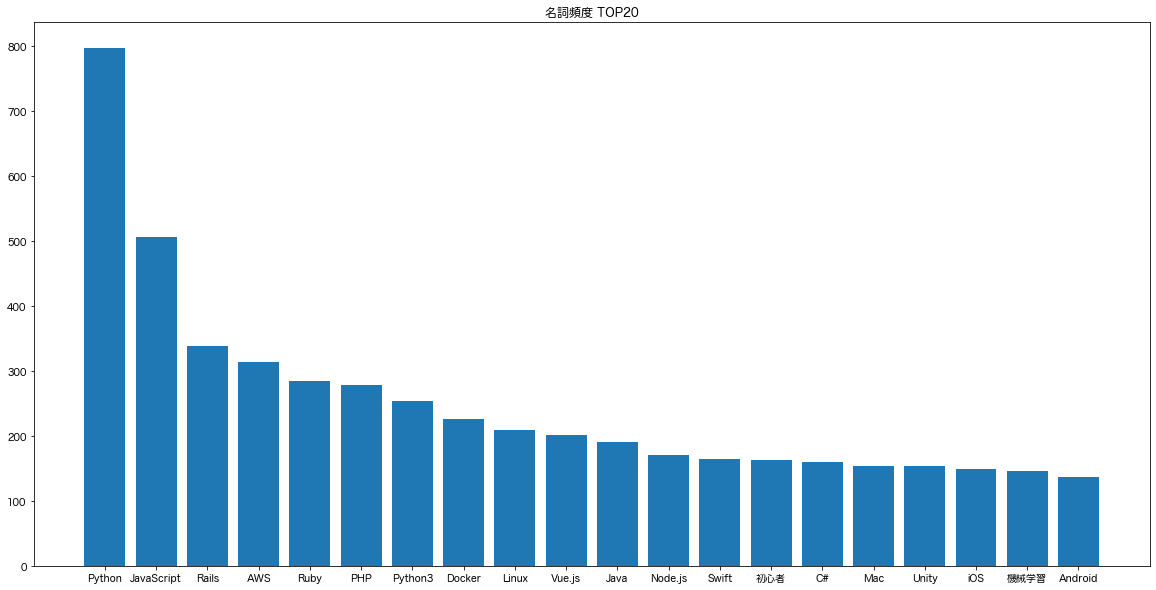

In [7]:
from collections import Counter

frequency = Counter()

for tag in df_content['tags_str']:
#     print(tag.split(','))
    frequency.update(tag.split(','))

# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# TOP20のグラフ           
x = range(20)
mc = frequency.most_common(20)              # 頻度TOP20を抽出
ch = [ch[0] for ch in mc]           # ひらがなのリスト
f = np.array([ch[1] for ch in mc])  # 頻度の数値のリスト


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ax.bar(x, f)
ax.set_xticks(x)
ax.set_xticklabels(ch , fontsize=10)  #日本語表示はfontproperties=fp
ax.set_title("名詞頻度 TOP20")

plt.show()